This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [65]:
import time
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
   return "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)

# Introduction to deep learning for computer vision

# MNIST - simple fcNN

In [99]:
import tensorflow as tf
print("tf ver = ",tf.__version__)  #1.14.0
import keras
import keras.utils as kutils
print("keras ver =", keras.__version__) #2.2.4
import pandas as pd
print("pandas ver =", pd.__version__) #0.25.2
import numpy as np
print("numpy ver =", np.__version__) # 1.16.1 (after >conda install numpy==1.16.1)   ow 1.16.5  as of 2019.10.10

# from tensorflow.keras.utils import to_categorical

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

tf ver =  2.15.0
keras ver = 2.15.0
pandas ver = 1.5.3
numpy ver = 1.25.2


In [100]:
from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data( )
print(train_data.shape) # (60000, 28, 28)
print(test_data.shape)  # (10000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_labels.shape)  # (10000,)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [101]:
train_images = train_data.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_data.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# from tensorflow.python.keras.utils import to_categorical
train_labels_cat = kutils.to_categorical(train_labels)
test_labels_cat = kutils.to_categorical(test_labels)

In [102]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [103]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [104]:
%%time
MODEL_NAME='MNIST_fcNN'
EPOCHS=5
BATCH_SZ=128

start_time = time.time()

#We’re now ready to train the network, which in Keras is done via a call to the network’s
#fit method — we fit the model to its training data:
model.fit(train_images, train_labels_cat, epochs=EPOCHS, batch_size=BATCH_SZ)

ex_time = exec_time(start=start_time,
                    end=time.time())
# print(f'ex_time={ex_time}')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2699 - accuracy: 0.9216
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1075 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0708 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9883
Execution Time: 00:00:17
CPU times: user 21.6 s, sys: 882 ms, total: 22.5 s
Wall time: 17.4 s


In [105]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('test_acc:', test_acc)
print('test_loss:', test_loss)


313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9744
test_acc: 0.974399983882904
test_loss: 0.08029592037200928


In [106]:
sz_train_data =  train_images.shape[0]
sz_train_data

60000

In [107]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_8 (ModuleWr  (None, 512)               401920    
 apper)                                                          
                                                                 
 module_wrapper_9 (ModuleWr  (None, 10)                5130      
 apper)                                                          
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
for layer in model.layers:
    print(f'layer._name={layer._name};     n_params={layer.count_params()}' )


layer._name=module_wrapper_8;     n_params=401920
layer._name=module_wrapper_9;     n_params=5130


In [114]:
d = pd.DataFrame(columns=['Model','TrainSetSz','Epochs','Batch_sz','TrainTime', 'nParams', 'Loss', 'Accuracy'])
d.loc[0,:] = [MODEL_NAME, sz_train_data, EPOCHS, BATCH_SZ,ex_time, model.count_params(), test_loss, test_acc]
d

,Model,TrainSetSz,Epochs,Batch_sz,TrainTime,nParams,Loss,Accuracy
0,MNIST_fcNN,60000,5,128,00:00:17,407050,0.080296,0.9744


# Introduction to convnets

# MNIST - CNN

**Instantiating a small convnet**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [13]:
# dir(model)
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

**Training the convnet on MNIST images**

In [14]:
%%time

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history=model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 32s 34ms/step - loss: 0.1589 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0446 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0308 - accuracy: 0.9911
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0175 - accuracy: 0.9944
CPU times: user 4min 11s, sys: 4.06 s, total: 4min 15s
Wall time: 2min 37s


In [15]:
# d

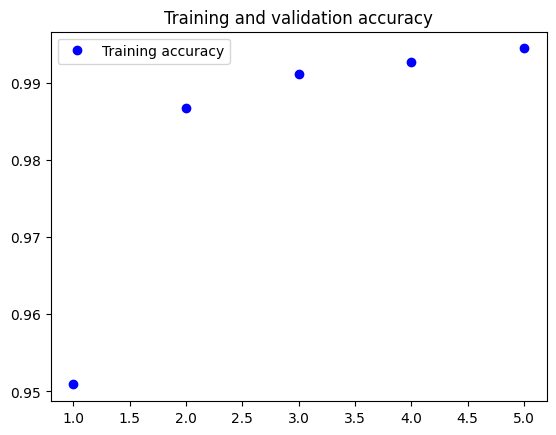

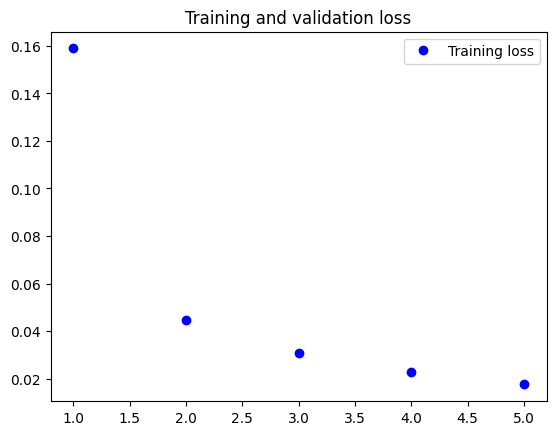

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
# val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
# plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the convnet**

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")



313/313 [==============================] - 2s 6ms/step - loss: 0.0233 - accuracy: 0.9935
Test accuracy: 0.993


In [18]:
d.loc[1,:] = ['MNIST_CNN+Pooling', 60000,5, 20.1,104202, 0.0255,0.9925]
d

,Method,TrainSetSz,Epochs,TrainWallTime_sec,NumPars,Loss,Accuracy
0,MNIST_fcNN,60000,5,9.7,407050,0.0658,0.9795
1,MNIST_CNN+Pooling,60000,5,20.1,104202,0.0255,0.9925


### The convolution operation

# Understanding border effects and padding
#### Understanding border effects and padding

# Understanding convolution strides
#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [19]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

In [23]:
%%time
model_no_max_pool.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history=model_no_max_pool.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 259s 276ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 2/5
938/938 [==============================] - 263s 280ms/step - loss: 0.0195 - accuracy: 0.9943
Epoch 3/5
938/938 [==============================] - 268s 286ms/step - loss: 0.0138 - accuracy: 0.9958
Epoch 4/5
938/938 [==============================] - 266s 283ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 5/5
938/938 [==============================] - 260s 277ms/step - loss: 0.0077 - accuracy: 0.9978
CPU times: user 37min 29s, sys: 1min 3s, total: 38min 32s
Wall time: 22min 22s


In [24]:
test_loss, test_acc = model_no_max_pool.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 13s 41ms/step - loss: 0.0503 - accuracy: 0.9899
Test accuracy: 0.990


In [25]:
d.loc[2,:] = ['MNIST_CNN_no_max_pool', 60000,5, 23.7, 712202, 0.036,0.99]
d

,Method,TrainSetSz,Epochs,TrainWallTime_sec,NumPars,Loss,Accuracy
0,MNIST_fcNN,60000,5,9.7,407050,0.0658,0.9795
1,MNIST_CNN+Pooling,60000,5,20.1,104202,0.0255,0.9925
2,MNIST_CNN_no_max_pool,60000,5,23.7,712202,0.036,0.99


# Training a convnet from scratch on
# a small dataset of CATS and DOGS

HOMEWORK: Train a model with no max pooling

### The relevance of deep learning for small-data problems

### Downloading the data

In [26]:
# from google.colab import files
# files.upload()


In [27]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:08<00:00, 50.2MB/s]
100% 812M/812M [00:08<00:00, 101MB/s] 


In [29]:
!unzip -qq dogs-vs-cats.zip

In [30]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [31]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)


make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [33]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [35]:
# d

**Configuring the model for training**

In [36]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [37]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [38]:
# train dataset size=2000, val=1000, test=2000

In [39]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [41]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [42]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [43]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [44]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [45]:
%%time
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 127s 2s/step - loss: 0.7027 - accuracy: 0.5280 - val_loss: 0.9285 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 125s 2s/step - loss: 0.6939 - accuracy: 0.5390 - val_loss: 0.6851 - val_accuracy: 0.5950
Epoch 3/30
63/63 [==============================] - 126s 2s/step - loss: 0.6880 - accuracy: 0.5605 - val_loss: 0.6649 - val_accuracy: 0.6180
Epoch 4/30
63/63 [==============================] - 118s 2s/step - loss: 0.6667 - accuracy: 0.6270 - val_loss: 0.6464 - val_accuracy: 0.6220
Epoch 5/30
63/63 [==============================] - 123s 2s/step - loss: 0.6329 - accuracy: 0.6385 - val_loss: 0.6369 - val_accuracy: 0.6240
Epoch 6/30
63/63 [==============================] - 128s 2s/step - loss: 0.5972 - accuracy: 0.6820 - val_loss: 0.6477 - val_accuracy: 0.6400
Epoch 7/30
63/63 [==============================] - 124s 2s/step - loss: 0.5752 - accuracy: 0.6955 - val_loss: 0.6126 - val_accuracy: 0.6470
Epoch 8/30
63

In [46]:
dir(train_dataset)
# train_dataset.snapshot
np.array(train_dataset)

array(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object)

**Displaying curves of loss and accuracy during training**

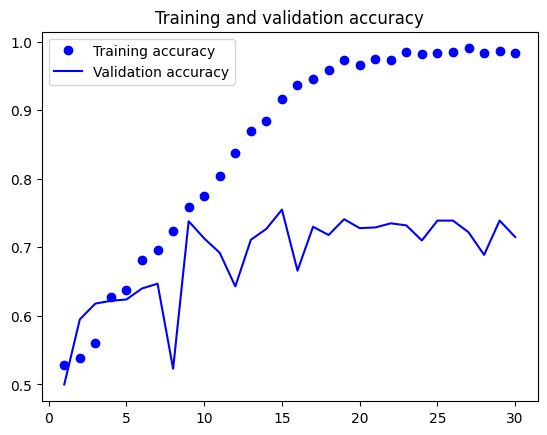

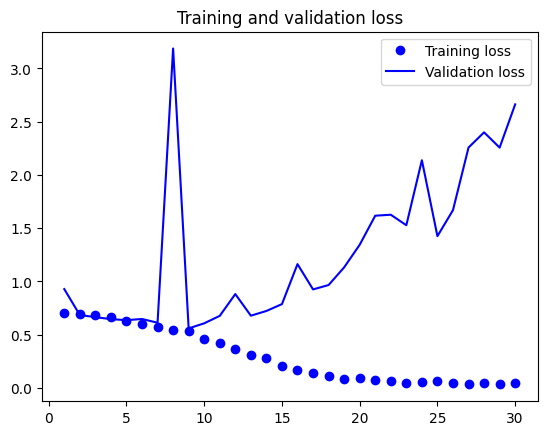

In [47]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [48]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 34s 526ms/step - loss: 0.5743 - accuracy: 0.7210
Test accuracy: 0.721


In [49]:
i=2
# d.loc[i,:] = ['CNN_NoPooling', 0,30, 170,991041, 0.57,0.72]
d

,Method,TrainSetSz,Epochs,TrainWallTime_sec,NumPars,Loss,Accuracy
0,MNIST_fcNN,60000,5,9.7,407050,0.0658,0.9795
1,MNIST_CNN+Pooling,60000,5,20.1,104202,0.0255,0.9925
2,MNIST_CNN_no_max_pool,60000,5,23.7,712202,0.036,0.99


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.summary()

**Training the regularized convnet**

In [ ]:
%%time
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
i=3
d.loc[i,:] = ['CNN_withAugmentedData', 0,100, 570,991041, 0.44,0.84]
d

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
%%time
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

**Defining and training the densely connected classifier**

In [ ]:
%%time
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

**Plotting the results**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)

#    the following line
# x = keras.applications.vgg16.preprocess_input(x)
#    has a bug and is replaced by a fix explained here:
# https://stackoverflow.com/questions/77716307/typeerror-cannot-serialize-object-ellipsis-of-type-class-ellipsis/77781616#77781616
x = keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x)

x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
%%time
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model.summary()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras", safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
i=4
d.loc[i,:] = ['CNN_withVGG16_features', 0,50, 257,17992001, 1.92,0.976]
d

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
%%time
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
i=5
d.loc[i,:] = ['VGG16_finetuned', 0,30, 183,14714688, 1.47,0.978]
d

In [ ]:
# https://stackoverflow.com/questions/50737192/tf-data-dataset-how-to-get-the-dataset-size-number-of-elements-in-an-epoch

# train_dataset.cardinality().numpy()

In [ ]:
# len(list(train_dataset))

In [ ]:
len(train_dataset.file_paths)

In [ ]:
# # train_dataset.__len__()
# # len(train_dataset) * BATCH_SIZE
# num_elements = 0
# for element in train_dataset:
#     num_elements += 1
# num_elements

## Summary